In [1]:
import os
from glob import glob
import yaml
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.float_format', lambda x: '%e' % x)
import json
from scipy.stats import wilcoxon
from itertools import combinations
# import scienceplots
# plt.style.use('science')

In [2]:
def extract_scores(path, key='mean'):
    with open(path, 'r') as f:
        scores = json.load(f)
    all_det_scores = {k: v[key] for (k, v) in filter(lambda x: 'all_det' in x[0], scores.items())}
    bl_det_scores = {k: v[key] for (k, v) in filter(lambda x: x[0][11:18] == 'yer_det', scores.items())}
    abl_det_scores = {k: v[key] for (k, v) in filter(lambda x: 'above_boundary_layer_det' in x[0], scores.items())}
    all_prob_scores = {k: v[key] for (k, v) in filter(lambda x: 'all_pro' in x[0], scores.items())}
    bl_prob_scores = {k: v[key] for (k, v) in filter(lambda x: x[0][11:18] == 'yer_pro', scores.items())}
    abl_prob_scores = {k: v[key] for (k, v) in filter(lambda x: 'above_boundary_layer_prob' in x[0], scores.items())}
    return all_det_scores, bl_det_scores, abl_det_scores, all_prob_scores, bl_prob_scores, abl_prob_scores

### Mean

In [12]:
all_det_scores = {}
boundary_layer_det_scores = {}
above_boundary_layer_det_scores = {}
all_prob_scores = {}
boundary_layer_prob_scores = {}
above_boundary_layer_prob_scores = {}

all_det, bl_det, abl_det, all_prob, bl_prob, abl_prob = extract_scores('../experiments/data/outputs/svgp/scores.json')

all_det_scores['svgp'] = all_det
boundary_layer_det_scores['svgp'] = bl_det
above_boundary_layer_det_scores['svgp'] = abl_det
all_prob_scores['svgp'] = all_prob
boundary_layer_prob_scores['svgp'] = bl_prob
above_boundary_layer_prob_scores['svgp'] = abl_prob


for dirpath in glob('../experiments/data/outputs/ablation/*'):
    path = os.path.join(dirpath, 'scores.json')
    all_det, bl_det, abl_det, all_prob, bl_prob, abl_prob = extract_scores(path)
    dirname = os.path.basename(dirpath)
    all_det_scores[dirname] = all_det
    boundary_layer_det_scores[dirname] = bl_det
    above_boundary_layer_det_scores[dirname] = abl_det
    all_prob_scores[dirname] = all_prob
    boundary_layer_prob_scores[dirname] = bl_prob
    above_boundary_layer_prob_scores[dirname] = abl_prob

In [13]:
det_columns = ['Bias98', 'Corr', 'MAE', 'Bias', 'RMSE']
prob_columns = ['ICI', 'Calib95', 'ELBO']
index = ['SVGP', 'Additive kernel', 'Meteo only', 'GP only', 'Spatiotemporal only', 'Product kernel']

index_order = ['SVGP', 'GP only', 'Spatiotemporal only', 'Meteo only',
               'Product kernel', 'Additive kernel']
det_cols_order = ['RMSE', 'MAE', 'Corr', 'Bias', 'Bias98']
prob_cols_order = ['ELBO', 'Calib95', 'ICI']

all_det_df = pd.DataFrame(all_det_scores).T
all_det_df.index = index
all_det_df.index.name = 'Model'
all_det_df.columns = det_columns
all_det_df = all_det_df.reindex(index_order)
all_det_df = all_det_df[det_cols_order]
all_det_df['Region'] = 'Entire column'

boundary_layer_det_df = pd.DataFrame(boundary_layer_det_scores).T
boundary_layer_det_df.index = index
boundary_layer_det_df.index.name = 'Model'
boundary_layer_det_df.columns = det_columns
boundary_layer_det_df = boundary_layer_det_df.reindex(index_order)
boundary_layer_det_df = boundary_layer_det_df[det_cols_order]
boundary_layer_det_df['Region'] = 'Boundary layer'

above_boundary_layer_det_df = pd.DataFrame(above_boundary_layer_det_scores).T
above_boundary_layer_det_df.index = index
above_boundary_layer_det_df.index.name = 'Model'
above_boundary_layer_det_df.columns = det_columns
above_boundary_layer_det_df = above_boundary_layer_det_df.reindex(index_order)
above_boundary_layer_det_df = above_boundary_layer_det_df[det_cols_order]
above_boundary_layer_det_df['Region'] = 'Above Boundary layer'

all_prob_df = pd.DataFrame(all_prob_scores).T
all_prob_df.index = index
all_prob_df.index.name = 'Model'
all_prob_df.columns = prob_columns
all_prob_df = all_prob_df.reindex(index_order)
all_prob_df = all_prob_df[prob_cols_order]
all_prob_df['Region'] = 'Entire column'

boundary_layer_prob_df = pd.DataFrame(boundary_layer_prob_scores).T
boundary_layer_prob_df.index = index
boundary_layer_prob_df.index.name = 'Model'
boundary_layer_prob_df.columns = prob_columns
boundary_layer_prob_df = boundary_layer_prob_df.reindex(index_order)
boundary_layer_prob_df = boundary_layer_prob_df[prob_cols_order]
boundary_layer_prob_df['Region'] = 'Boundary layer'

above_boundary_layer_prob_df = pd.DataFrame(above_boundary_layer_prob_scores).T
above_boundary_layer_prob_df.index = index
above_boundary_layer_prob_df.index.name = 'Model'
above_boundary_layer_prob_df.columns = prob_columns
above_boundary_layer_prob_df = above_boundary_layer_prob_df.reindex(index_order)
above_boundary_layer_prob_df = above_boundary_layer_prob_df[prob_cols_order]
above_boundary_layer_prob_df['Region'] = 'Above Boundary layer'

mean_deterministic_df = pd.concat([all_det_df, boundary_layer_det_df, above_boundary_layer_det_df]).set_index('Region', append=True).swaplevel()
mean_probabilistic_df = pd.concat([all_prob_df, boundary_layer_prob_df, above_boundary_layer_prob_df]).set_index('Region', append=True).swaplevel()

In [15]:
# mean_deterministic_df.to_latex('./tables/mean_deterministic_scores.tex')
mean_deterministic_df

/tmp/ipykernel_15100/3083806869.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  mean_deterministic_df.to_latex('./tables/mean_deterministic_scores.tex')


RMSE          MAE  \
Region               Model                                           
Entire column        SVGP                3.211290e-05 5.287200e-06   
                     GP only             3.328680e-05 5.121800e-06   
                     Spatiotemporal only 4.103000e-05 6.649500e-06   
                     Meteo only          3.365280e-05 5.814700e-06   
                     Product kernel      3.651470e-05 5.918000e-06   
                     Additive kernel     3.461290e-05 6.027400e-06   
Boundary layer       SVGP                5.911320e-05 1.533270e-05   
                     GP only             6.124610e-05 1.407000e-05   
                     Spatiotemporal only 7.549200e-05 1.681380e-05   
                     Meteo only          6.196990e-05 1.760040e-05   
                     Product kernel      6.725920e-05 1.652330e-05   
                     Additive kernel     6.381380e-05 1.839430e-05   
Above Boundary layer SVGP                4.856800e-06 1.177600e-06   
                     GP only             5.171500e-06 1.461100e-06   
                     Spatiotemporal only 6.381100e-06 2.491400e-06   
                     Meteo only          4.979100e-06 9.932000e-07   
                     Product kernel      5.303600e-06 1.579500e-06   
                     Additive kernel     4.718600e-06 9.682000e-07   

                                                 Corr          Bias  \
Region               Model                                            
Entire column        SVGP                7.267024e-01 -4.800000e-09   
                     GP only             7.341377e-01 -9.329000e-07   
                     Spatiotemporal only 5.121724e-01 -2.412100e-06   
                     Meteo only          6.690519e-01  2.843000e-07   
                     Product kernel      6.097919e-01 -5.362000e-07   
                     Additive kernel     6.397704e-01  6.081000e-07   
Boundary layer       SVGP                7.186442e-01 -4.042000e-07   
                     GP only             7.297587e-01 -4.527600e-06   
                     Spatiotemporal only 5.356177e-01 -1.288320e-05   
                     Meteo only          6.546082e-01  1.951200e-06   
                     Product kernel      5.898680e-01 -3.459100e-06   
                     Additive kernel     6.201373e-01  2.544800e-06   
Above Boundary layer SVGP                4.296660e-01  1.586000e-07   
                     GP only             4.040800e-01  5.377000e-07   
                     Spatiotemporal only 3.197590e-01  1.871500e-06   
                     Meteo only          3.611038e-01 -3.976000e-07   
                     Product kernel      3.356838e-01  6.595000e-07   
                     Additive kernel     4.643013e-01 -1.842000e-07   

                                                Bias98  
Region               Model                              
Entire column        SVGP                -4.815900e-06  
                     GP only             -1.697540e-05  
                     Spatiotemporal only -4.091300e-05  
                     Meteo only           5.794500e-06  
                     Product kernel      -1.154680e-05  
                     Additive kernel      5.380000e-06  
Boundary layer       SVGP                -4.527830e-05  
                     GP only             -6.693950e-05  
                     Spatiotemporal only -1.170025e-04  
                     Meteo only          -3.264390e-05  
                     Product kernel      -5.639460e-05  
                     Additive kernel     -2.738250e-05  
Above Boundary layer SVGP                -1.553000e-07  
                     GP only              2.496100e-06  
                     Spatiotemporal only  7.772200e-06  
                     Meteo only          -4.599000e-06  
                     Product kernel       1.591200e-06  
                     Additive kernel     -2.683700e-06

In [16]:
# mean_probabilistic_df.to_latex('./tables/mean_probabilistic_scores.tex')
mean_probabilistic_df

/tmp/ipykernel_15100/1546194043.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  mean_probabilistic_df.to_latex('./tables/mean_probabilistic_scores.tex')


ELBO      Calib95  \
Region               Model                                           
Entire column        SVGP                1.301816e+01 9.348329e-01   
                     GP only             1.293597e+01 9.141707e-01   
                     Spatiotemporal only 1.304762e+01 9.218768e-01   
                     Meteo only          1.266473e+01 8.406800e-01   
                     Product kernel      1.302683e+01 9.390764e-01   
                     Additive kernel     1.304441e+01 9.303319e-01   
Boundary layer       SVGP                1.071218e+01 9.868522e-01   
                     GP only             1.066243e+01 9.864144e-01   
                     Spatiotemporal only 1.046532e+01 9.328156e-01   
                     Meteo only          1.070707e+01 9.817122e-01   
                     Product kernel      1.062178e+01 9.832978e-01   
                     Additive kernel     1.074322e+01 9.806133e-01   
Above Boundary layer SVGP                1.396151e+01 9.136282e-01   
                     GP only             1.386605e+01 8.847741e-01   
                     Spatiotemporal only 1.410401e+01 9.173209e-01   
                     Meteo only          1.346558e+01 7.831427e-01   
                     Product kernel      1.401071e+01 9.213968e-01   
                     Additive kernel     1.398580e+01 9.100450e-01   

                                                  ICI  
Region               Model                             
Entire column        SVGP                6.602290e-02  
                     GP only             7.241903e-02  
                     Spatiotemporal only 7.646521e-02  
                     Meteo only          1.252093e-01  
                     Product kernel      4.447301e-02  
                     Additive kernel     7.105827e-02  
Boundary layer       SVGP                6.262099e-02  
                     GP only             8.172357e-02  
                     Spatiotemporal only 1.484796e-01  
                     Meteo only          4.751971e-02  
                     Product kernel      7.155269e-02  
                     Additive kernel     3.842398e-02  
Above Boundary layer SVGP                7.762971e-02  
                     GP only             7.480751e-02  
                     Spatiotemporal only 4.693041e-02  
                     Meteo only          1.644602e-01  
                     Product kernel      3.728938e-02  
                     Additive kernel     9.534024e-02

### Stddev

In [17]:
all_det_scores = {}
boundary_layer_det_scores = {}
above_boundary_layer_det_scores = {}
all_prob_scores = {}
boundary_layer_prob_scores = {}
above_boundary_layer_prob_scores = {}

all_det, bl_det, abl_det, all_prob, bl_prob, abl_prob = extract_scores('../experiments/data/outputs/svgp/scores.json', key='std')

all_det_scores['svgp'] = all_det
boundary_layer_det_scores['svgp'] = bl_det
above_boundary_layer_det_scores['svgp'] = abl_det
all_prob_scores['svgp'] = all_prob
boundary_layer_prob_scores['svgp'] = bl_prob
above_boundary_layer_prob_scores['svgp'] = abl_prob

for dirpath in glob('../experiments/data/outputs/ablation/*'):
    path = os.path.join(dirpath, 'scores.json')
    all_det, bl_det, abl_det, all_prob, bl_prob, abl_prob = extract_scores(path, key='std')
    dirname = os.path.basename(dirpath)
    all_det_scores[dirname] = all_det
    boundary_layer_det_scores[dirname] = bl_det
    above_boundary_layer_det_scores[dirname] = abl_det
    all_prob_scores[dirname] = all_prob
    boundary_layer_prob_scores[dirname] = bl_prob
    above_boundary_layer_prob_scores[dirname] = abl_prob

In [18]:
det_columns = ['Bias98', 'Corr', 'MAE', 'Bias', 'RMSE']
prob_columns = ['ICI', 'Calib95', 'ELBO']
index = ['SVGP', 'Additive kernel', 'Meteo only', 'GP only', 'Spatiotemporal only', 'Product kernel']

index_order = ['SVGP', 'GP only', 'Spatiotemporal only', 'Meteo only',
               'Product kernel', 'Additive kernel']
det_cols_order = ['RMSE', 'MAE', 'Corr', 'Bias', 'Bias98']
prob_cols_order = ['ELBO', 'Calib95', 'ICI']

all_det_df = pd.DataFrame(all_det_scores).T
all_det_df.index = index
all_det_df.index.name = 'Model'
all_det_df.columns = det_columns
all_det_df = all_det_df.reindex(index_order)
all_det_df = all_det_df[det_cols_order]
all_det_df['Region'] = 'Entire column'

boundary_layer_det_df = pd.DataFrame(boundary_layer_det_scores).T
boundary_layer_det_df.index = index
boundary_layer_det_df.index.name = 'Model'
boundary_layer_det_df.columns = det_columns
boundary_layer_det_df = boundary_layer_det_df.reindex(index_order)
boundary_layer_det_df = boundary_layer_det_df[det_cols_order]
boundary_layer_det_df['Region'] = 'Boundary layer'

above_boundary_layer_det_df = pd.DataFrame(above_boundary_layer_det_scores).T
above_boundary_layer_det_df.index = index
above_boundary_layer_det_df.index.name = 'Model'
above_boundary_layer_det_df.columns = det_columns
above_boundary_layer_det_df = above_boundary_layer_det_df.reindex(index_order)
above_boundary_layer_det_df = above_boundary_layer_det_df[det_cols_order]
above_boundary_layer_det_df['Region'] = 'Above Boundary layer'

all_prob_df = pd.DataFrame(all_prob_scores).T
all_prob_df.index = index
all_prob_df.index.name = 'Model'
all_prob_df.columns = prob_columns
all_prob_df = all_prob_df.reindex(index_order)
all_prob_df = all_prob_df[prob_cols_order]
all_prob_df['Region'] = 'Entire column'

boundary_layer_prob_df = pd.DataFrame(boundary_layer_prob_scores).T
boundary_layer_prob_df.index = index
boundary_layer_prob_df.index.name = 'Model'
boundary_layer_prob_df.columns = prob_columns
boundary_layer_prob_df = boundary_layer_prob_df.reindex(index_order)
boundary_layer_prob_df = boundary_layer_prob_df[prob_cols_order]
boundary_layer_prob_df['Region'] = 'Boundary layer'

above_boundary_layer_prob_df = pd.DataFrame(above_boundary_layer_prob_scores).T
above_boundary_layer_prob_df.index = index
above_boundary_layer_prob_df.index.name = 'Model'
above_boundary_layer_prob_df.columns = prob_columns
above_boundary_layer_prob_df = above_boundary_layer_prob_df.reindex(index_order)
above_boundary_layer_prob_df = above_boundary_layer_prob_df[prob_cols_order]
above_boundary_layer_prob_df['Region'] = 'Above Boundary layer'

stddev_deterministic_df = pd.concat([all_det_df, boundary_layer_det_df, above_boundary_layer_det_df]).set_index('Region', append=True).swaplevel()
stddev_probabilistic_df = pd.concat([all_prob_df, boundary_layer_prob_df, above_boundary_layer_prob_df]).set_index('Region', append=True).swaplevel()

In [19]:
# stddev_deterministic_df.to_latex('./tables/stddev_deterministic_scores.tex')
stddev_deterministic_df

/tmp/ipykernel_15100/3468077900.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  stddev_deterministic_df.to_latex('./tables/stddev_deterministic_scores.tex')


RMSE          MAE  \
Region               Model                                           
Entire column        SVGP                3.712000e-07 6.270000e-08   
                     GP only             5.091000e-07 4.180000e-08   
                     Spatiotemporal only 0.000000e+00 0.000000e+00   
                     Meteo only          3.085000e-07 3.990000e-08   
                     Product kernel      2.607000e-07 8.680000e-08   
                     Additive kernel     2.220000e-07 1.154000e-07   
Boundary layer       SVGP                6.908000e-07 2.923000e-07   
                     GP only             9.431000e-07 9.990000e-08   
                     Spatiotemporal only 0.000000e+00 0.000000e+00   
                     Meteo only          5.729000e-07 1.720000e-07   
                     Product kernel      4.784000e-07 2.727000e-07   
                     Additive kernel     4.142000e-07 4.197000e-07   
Above Boundary layer SVGP                6.040000e-08 4.120000e-08   
                     GP only             9.820000e-08 5.270000e-08   
                     Spatiotemporal only 0.000000e+00 0.000000e+00   
                     Meteo only          2.900000e-08 2.340000e-08   
                     Product kernel      6.130000e-08 2.560000e-08   
                     Additive kernel     1.420000e-08 3.470000e-08   

                                                 Corr         Bias  \
Region               Model                                           
Entire column        SVGP                5.891271e-03 1.605000e-07   
                     GP only             8.177936e-03 1.453000e-07   
                     Spatiotemporal only 3.200000e-09 0.000000e+00   
                     Meteo only          6.991607e-03 1.316000e-07   
                     Product kernel      1.271760e-02 5.140000e-08   
                     Additive kernel     6.822358e-03 1.417000e-07   
Boundary layer       SVGP                6.119416e-03 7.059000e-07   
                     GP only             7.985103e-03 6.584000e-07   
                     Spatiotemporal only 3.700000e-09 0.000000e+00   
                     Meteo only          7.874301e-03 5.628000e-07   
                     Product kernel      1.450283e-02 2.173000e-07   
                     Additive kernel     7.796694e-03 5.616000e-07   
Above Boundary layer SVGP                1.090704e-02 6.690000e-08   
                     GP only             9.451525e-03 6.910000e-08   
                     Spatiotemporal only 3.000000e-09 0.000000e+00   
                     Meteo only          8.629661e-03 4.650000e-08   
                     Product kernel      9.981123e-03 2.730000e-08   
                     Additive kernel     8.952204e-03 7.310000e-08   

                                               Bias98  
Region               Model                             
Entire column        SVGP                2.115800e-06  
                     GP only             1.871900e-06  
                     Spatiotemporal only 0.000000e+00  
                     Meteo only          1.859900e-06  
                     Product kernel      9.118000e-07  
                     Additive kernel     2.046400e-06  
Boundary layer       SVGP                4.444500e-06  
                     GP only             3.813900e-06  
                     Spatiotemporal only 0.000000e+00  
                     Meteo only          3.013100e-06  
                     Product kernel      2.755700e-06  
                     Additive kernel     3.961300e-06  
Above Boundary layer SVGP                6.807000e-07  
                     GP only             6.311000e-07  
                     Spatiotemporal only 0.000000e+00  
                     Meteo only          4.860000e-07  
                     Product kernel      2.617000e-07  
                     Additive kernel     7.055000e-07

In [20]:
# stddev_probabilistic_df.to_latex('./tables/stddev_probabilistic_scores.tex')
stddev_probabilistic_df

/tmp/ipykernel_15100/2734616032.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  stddev_probabilistic_df.to_latex('./tables/stddev_probabilistic_scores.tex')


ELBO      Calib95  \
Region               Model                                           
Entire column        SVGP                1.479370e-02 3.835557e-03   
                     GP only             9.495990e-03 2.869381e-03   
                     Spatiotemporal only 3.333950e-04 2.380020e-04   
                     Meteo only          2.915228e-02 6.686874e-03   
                     Product kernel      4.986090e-03 1.405006e-03   
                     Additive kernel     2.305572e-02 4.114707e-03   
Boundary layer       SVGP                1.010277e-02 3.780642e-04   
                     GP only             1.424410e-02 7.093587e-04   
                     Spatiotemporal only 1.535341e-03 2.449090e-04   
                     Meteo only          8.235504e-03 9.182940e-04   
                     Product kernel      7.646947e-03 1.075308e-03   
                     Additive kernel     4.165707e-03 6.318260e-04   
Above Boundary layer SVGP                2.120095e-02 5.178493e-03   
                     GP only             1.493675e-02 4.188740e-03   
                     Spatiotemporal only 4.045747e-04 2.870615e-04   
                     Meteo only          4.175585e-02 9.452041e-03   
                     Product kernel      7.175480e-03 1.887644e-03   
                     Additive kernel     3.225994e-02 5.717772e-03   

                                                  ICI  
Region               Model                             
Entire column        SVGP                4.496971e-03  
                     GP only             3.559696e-03  
                     Spatiotemporal only 2.040086e-04  
                     Meteo only          5.568436e-03  
                     Product kernel      1.484293e-03  
                     Additive kernel     4.349274e-03  
Boundary layer       SVGP                3.442293e-03  
                     GP only             4.016090e-03  
                     Spatiotemporal only 1.783418e-04  
                     Meteo only          1.827004e-03  
                     Product kernel      2.045683e-03  
                     Additive kernel     1.664181e-03  
Above Boundary layer SVGP                5.913137e-03  
                     GP only             5.664512e-03  
                     Spatiotemporal only 3.333672e-04  
                     Meteo only          8.788793e-03  
                     Product kernel      2.637732e-03  
                     Additive kernel     6.695676e-03

## Ablation plots

In [3]:
def extract_values_asarray(path):
    with open(path, 'r') as f:
        scores = json.load(f)
    all_det_scores = {k: np.asarray(v['values']) for (k, v) in filter(lambda x: 'all_det' in x[0], scores.items())}
    bl_det_scores = {k: np.asarray(v['values']) for (k, v) in filter(lambda x: x[0][11:18] == 'yer_det', scores.items())}
    abl_det_scores = {k: np.asarray(v['values']) for (k, v) in filter(lambda x: 'above_boundary_layer_det' in x[0], scores.items())}
    all_prob_scores = {k: np.asarray(v['values']) for (k, v) in filter(lambda x: 'all_pro' in x[0], scores.items())}
    bl_prob_scores = {k: np.asarray(v['values']) for (k, v) in filter(lambda x: x[0][11:18] == 'yer_pro', scores.items())}
    abl_prob_scores = {k: np.asarray(v['values']) for (k, v) in filter(lambda x: 'above_boundary_layer_prob' in x[0], scores.items())}
    return all_det_scores, bl_det_scores, abl_det_scores, all_prob_scores, bl_prob_scores, abl_prob_scores

In [4]:
all_det_scores = {}
boundary_layer_det_scores = {}
above_boundary_layer_det_scores = {}
all_prob_scores = {}
boundary_layer_prob_scores = {}
above_boundary_layer_prob_scores = {}

all_det, bl_det, abl_det, all_prob, bl_prob, abl_prob = extract_values_asarray('../experiments/data/outputs/svgp/scores.json')

all_det_scores['svgp'] = all_det
boundary_layer_det_scores['svgp'] = bl_det
above_boundary_layer_det_scores['svgp'] = abl_det
all_prob_scores['svgp'] = all_prob
boundary_layer_prob_scores['svgp'] = bl_prob
above_boundary_layer_prob_scores['svgp'] = abl_prob

for dirpath in glob('../experiments/data/outputs/ablation/*'):
    path = os.path.join(dirpath, 'scores.json')
    all_det, bl_det, abl_det, all_prob, bl_prob, abl_prob = extract_values_asarray(path)
    dirname = os.path.basename(dirpath)
    all_det_scores[dirname] = all_det
    boundary_layer_det_scores[dirname] = bl_det
    above_boundary_layer_det_scores[dirname] = abl_det
    all_prob_scores[dirname] = all_prob
    boundary_layer_prob_scores[dirname] = bl_prob
    above_boundary_layer_prob_scores[dirname] = abl_prob

In [5]:
det_columns = ['Bias98', 'Corr', 'MAE', 'Bias', 'RMSE']
prob_columns = ['ICI', 'Calib95', 'ELBO']
index = ['SVGP', 'Additive kernel', 'Meteo only', 'GP only', 'Spatiotemporal only', 'Product kernel']

index_order = ['SVGP', 'GP only', 'Spatiotemporal only', 'Meteo only',
               'Product kernel', 'Additive kernel']
det_cols_order = ['RMSE', 'MAE', 'Corr', 'Bias', 'Bias98']
prob_cols_order = ['ELBO', 'Calib95', 'ICI']

In [54]:
all_det_df = pd.DataFrame(all_det_scores).T
all_det_df.index = index
all_det_df.index.name = 'Model'
all_det_df.columns = det_columns
all_det_df = all_det_df.reindex(index_order)
all_det_df = all_det_df[det_cols_order]

all_prob_df = pd.DataFrame(all_prob_scores).T
all_prob_df.index = index
all_prob_df.index.name = 'Model'
all_prob_df.columns = prob_columns
all_prob_df = all_prob_df.reindex(index_order)
all_prob_df = all_prob_df[prob_cols_order]

all_df = pd.concat([all_det_df, all_prob_df], axis=1)
all_df['Bias'] = np.abs(all_df['Bias'])
all_df['Bias98'] = np.abs(all_df['Bias98'])
all_df['Calib95'] = np.abs(all_df['Calib95'] - 0.95)
all_df['Corr'] = -all_df['Corr']
all_df['ELBO'] = -all_df['ELBO']

In [57]:
diff_gp_only = 100 * (all_df.loc['SVGP'] - all_df.loc['GP only']) / np.abs(all_df.loc['SVGP'])
mean = np.mean(diff_gp_only.tolist(), axis=1)
stddev = np.std(diff_gp_only.tolist(), axis=1)
diff_gp_only = pd.DataFrame(data=np.stack([mean, stddev]), columns=diff_gp_only.index)
diff_gp_only.index = ['mean', 'stddev']
diff_gp_only

,RMSE,MAE,Corr,Bias,Bias98,ELBO,Calib95,ICI
mean,-3.653478e+00,3.112616e+00,1.023224e+00,-1.093937e+03,-3.097266e+02,-6.312329e-01,-1.467788e+02,-9.969074e+00
stddev,7.148315e-01,1.532067e+00,7.446666e-01,9.925246e+02,1.511757e+02,1.065524e-01,4.885505e+01,6.178859e+00


In [58]:
diff_spatiotemporal_only = 100 * (all_df.loc['SVGP'] - all_df.loc['Spatiotemporal only']) / np.abs(all_df.loc['SVGP'])
mean = np.mean(diff_spatiotemporal_only.tolist(), axis=1)
stddev = np.std(diff_spatiotemporal_only.tolist(), axis=1)
diff_spatiotemporal_only = pd.DataFrame(data=np.stack([mean, stddev]), columns=diff_spatiotemporal_only.index)
diff_spatiotemporal_only.index = ['mean', 'stddev']
diff_spatiotemporal_only

,RMSE,MAE,Corr,Bias,Bias98,ELBO,Calib95,ICI
mean,-2.778357e+01,-2.578290e+01,-2.951686e+01,-2.994325e+03,-9.092678e+02,2.264267e-01,-9.525207e+01,-1.629314e+01
stddev,1.408089e+00,1.418358e+00,5.426439e-01,2.476555e+03,4.085973e+02,1.076029e-01,4.254718e+01,7.405056e+00


In [59]:
diff_meteo_only = 100 * (all_df.loc['SVGP'] - all_df.loc['Meteo only']) / np.abs(all_df.loc['SVGP'])
mean = np.mean(diff_meteo_only.tolist(), axis=1)
stddev = np.std(diff_meteo_only.tolist(), axis=1)
diff_meteo_only = pd.DataFrame(data=np.stack([mean, stddev]), columns=diff_meteo_only.index)
diff_meteo_only.index = ['mean', 'stddev']
diff_meteo_only

,RMSE,MAE,Corr,Bias,Bias98,ELBO,Calib95,ICI
mean,-4.805976e+00,-9.988786e+00,-7.927124e+00,-2.470016e+02,-5.000067e+01,-2.714908e+00,-6.558713e+02,-9.018286e+01
stddev,1.303149e+00,1.221879e+00,1.205346e+00,2.313441e+02,7.664804e+01,1.794402e-01,1.597588e+02,1.073484e+01


In [60]:
diff_ablation_mean = pd.concat([diff_gp_only.loc['mean'], 
                                diff_spatiotemporal_only.loc['mean'],
                                diff_meteo_only.loc['mean']], axis=1).T
diff_ablation_stddev = pd.concat([diff_gp_only.loc['stddev'], 
                                  diff_spatiotemporal_only.loc['stddev'],
                                  diff_meteo_only.loc['stddev']], axis=1).T
diff_ablation_mean.index = ['GP only', 'ST only', 'Meteo only']
diff_ablation_stddev.index = ['GP only', 'ST only', 'Meteo only']

In [38]:
colname = 'Bias'
means = diff_ablation_mean[colname]
stddevs = diff_ablation_stddev[colname]
amax = max(np.abs(means + stddevs).max(), np.abs(means - stddevs).max()) + 5

Text(0.5, 1.0, 'ABC123 vs $\\mathrm{ABC123}^{123}$')

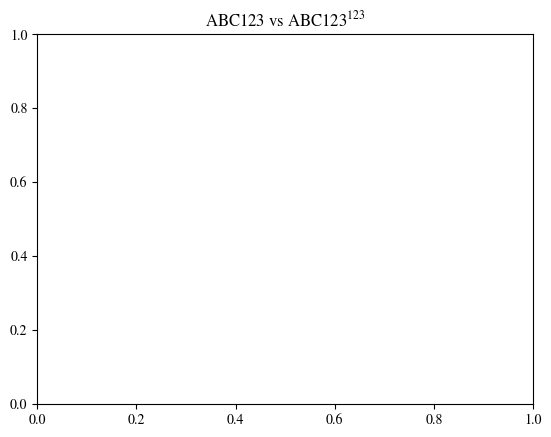

In [13]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

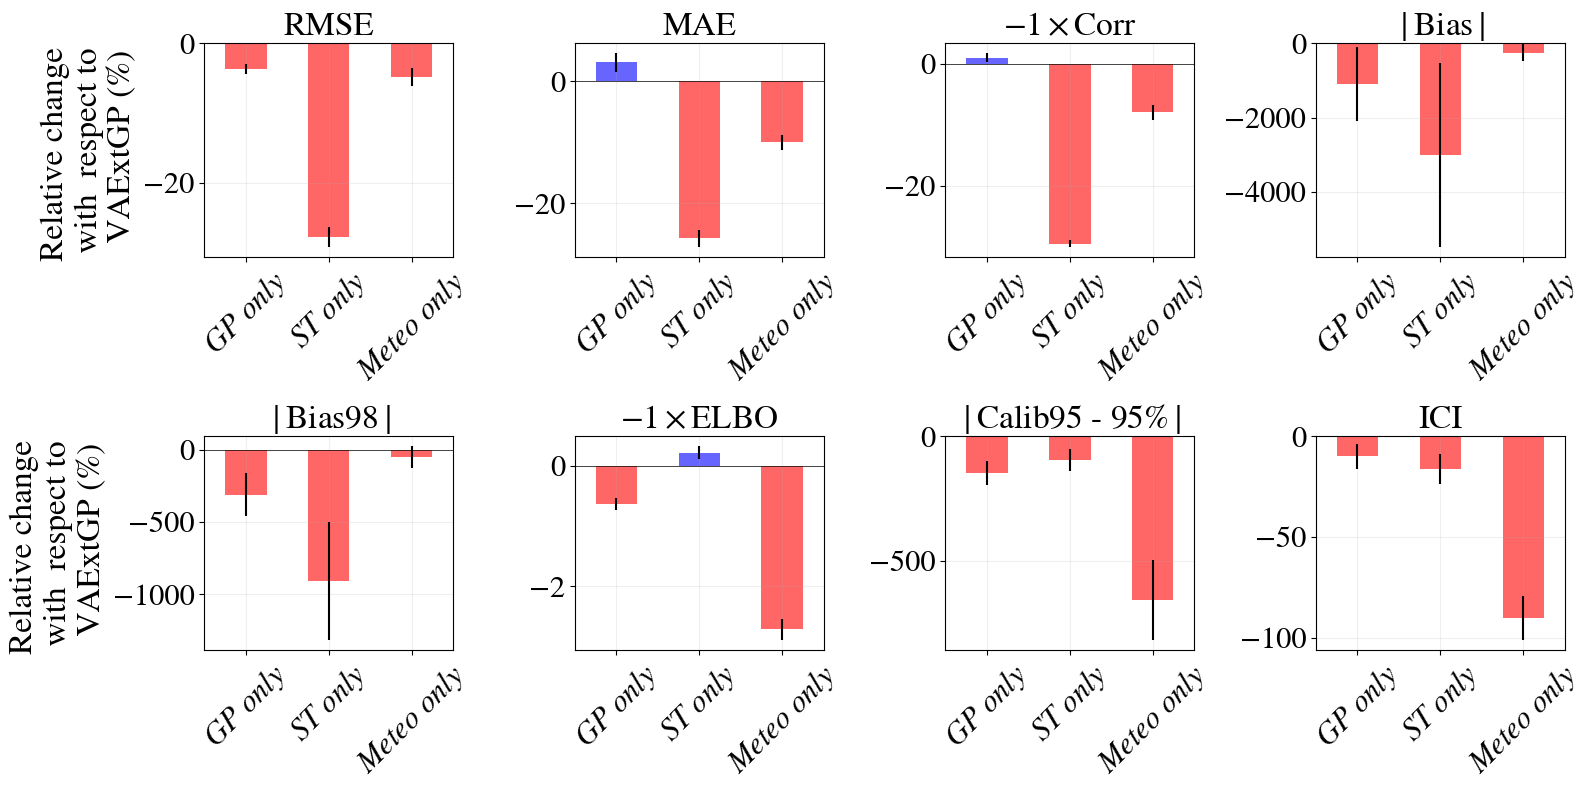

In [91]:
fig, ax = plt.subplots(2, 4, figsize=(16, 8))

labels = ['RMSE', 'MAE', r'$-1 \times$Corr', r'$\mid $Bias$\mid$',
          '$\mid$Bias98$\mid$', r'$-1 \times$ELBO', '$\mid$Calib95 - 95%$\mid$', 'ICI']
for i, colname in enumerate(diff_ablation_mean.columns):
    means = diff_ablation_mean[colname]
    stddevs = diff_ablation_stddev[colname]
    amax = max(np.abs(means + stddevs).max(), np.abs(means - stddevs).max()) + 5
    amin = -amax
    colors = ['red' if x < 0 else 'blue' for x in means]
    ax_ = means.plot(kind='bar', ax=ax[i // 4, i % 4], color=colors, alpha=0.6, yerr=[stddevs, stddevs])
    xmin, xmax = ax_.get_xlim()
    ax_.hlines(y=0., xmin=-4, xmax=4, linewidth=0.5, color='black')
    ax_.set_xticklabels([r'$GP$ $only$', r'$ST$ $only$', r'$Meteo$ $only$'],
                        rotation=45, ha='center')
    ax_.tick_params(labelsize=22)
    ax_.set_xlim(xmin, xmax)
#     ax_.set_ylim(-100, 100)
    ax_.set_title(labels[i], fontsize=24)
    ax_.grid(alpha=0.2)
    
ax[0, 0].set_ylabel('Relative change \n with  respect to \n VAExtGP (%)', fontsize=24)
ax[1, 0].set_ylabel('Relative change \n with  respect to \n VAExtGP (%)', fontsize=24)
plt.tight_layout()
plt.savefig('./figures/ablation-relative-changes.jpg', dpi=200)
plt.show()

## Statistical significance

In [22]:
def paired_wilcoxon(df):
    rows = list(df.index)
    cols = df.columns
    W_dict = {}
    p_dict = {}
    for k, metric in enumerate(rows):
        W_values = np.zeros((len(cols), len(cols)))
        p_values = np.zeros((len(cols), len(cols)))
        metric_df = df.loc[metric]
        for i, j in combinations(range(len(cols)), 2):
            W, p = wilcoxon(x=metric_df[cols[i]],
                            y=metric_df[cols[j]])
            W_values[i, j] = W
            p_values[i, j] = p
        W_values =  W_values + W_values.T - np.eye(len(cols))
        p_values = p_values + p_values.T - np.eye(len(cols))
        W_dict[metric] = pd.DataFrame(data=W_values, columns=cols, index=cols)
        p_dict[metric] = pd.DataFrame(data=p_values, columns=cols, index=cols)
    return W_dict, p_dict

In [23]:
all_det_scores = {}
boundary_layer_det_scores = {}
above_boundary_layer_det_scores = {}
all_prob_scores = {}
boundary_layer_prob_scores = {}
above_boundary_layer_prob_scores = {}

all_det, bl_det, abl_det, all_prob, bl_prob, abl_prob = extract_scores('../experiments/data/outputs/svgp/scores.json', key='values')

all_det_scores['svgp'] = all_det
boundary_layer_det_scores['svgp'] = bl_det
above_boundary_layer_det_scores['svgp'] = abl_det
all_prob_scores['svgp'] = all_prob
boundary_layer_prob_scores['svgp'] = bl_prob
above_boundary_layer_prob_scores['svgp'] = abl_prob

for dirpath in glob('../experiments/data/outputs/ablation/*'):
    path = os.path.join(dirpath, 'scores.json')
    all_det, bl_det, abl_det, all_prob, bl_prob, abl_prob = extract_scores(path, key='values')
    dirname = os.path.basename(dirpath)
    all_det_scores[dirname] = all_det
    boundary_layer_det_scores[dirname] = bl_det
    above_boundary_layer_det_scores[dirname] = abl_det
    all_prob_scores[dirname] = all_prob
    boundary_layer_prob_scores[dirname] = bl_prob
    above_boundary_layer_prob_scores[dirname] = abl_prob

In [24]:
det_columns = ['Bias98', 'Corr', 'MAE', 'Bias', 'RMSE']
prob_columns = ['ICI', 'Calib95', 'ELBO']
index = ['SVGP', 'Additive kernel', 'Meteo only', 'GP only', 'Spatiotemporal only', 'Product kernel']

index_order = ['SVGP', 'GP only', 'Spatiotemporal only', 'Meteo only',
               'Product kernel', 'Additive kernel']
det_cols_order = ['RMSE', 'MAE', 'Corr', 'Bias', 'Bias98']
prob_cols_order = ['ELBO', 'Calib95', 'ICI']

In [15]:
all_det_df = pd.DataFrame(all_det_scores).T
all_det_df.index = index
all_det_df.index.name = 'Model'
all_det_df.columns = det_columns
all_det_df = all_det_df.reindex(index_order)
all_det_df = all_det_df[det_cols_order]

all_prob_df = pd.DataFrame(all_prob_scores).T
all_prob_df.index = index
all_prob_df.index.name = 'Model'
all_prob_df.columns = prob_columns
all_prob_df = all_prob_df.reindex(index_order)
all_prob_df = all_prob_df[prob_cols_order]

all_df = pd.concat([all_det_df, all_prob_df], axis=1)
W_dict, p_dict = paired_wilcoxon(all_df.T)

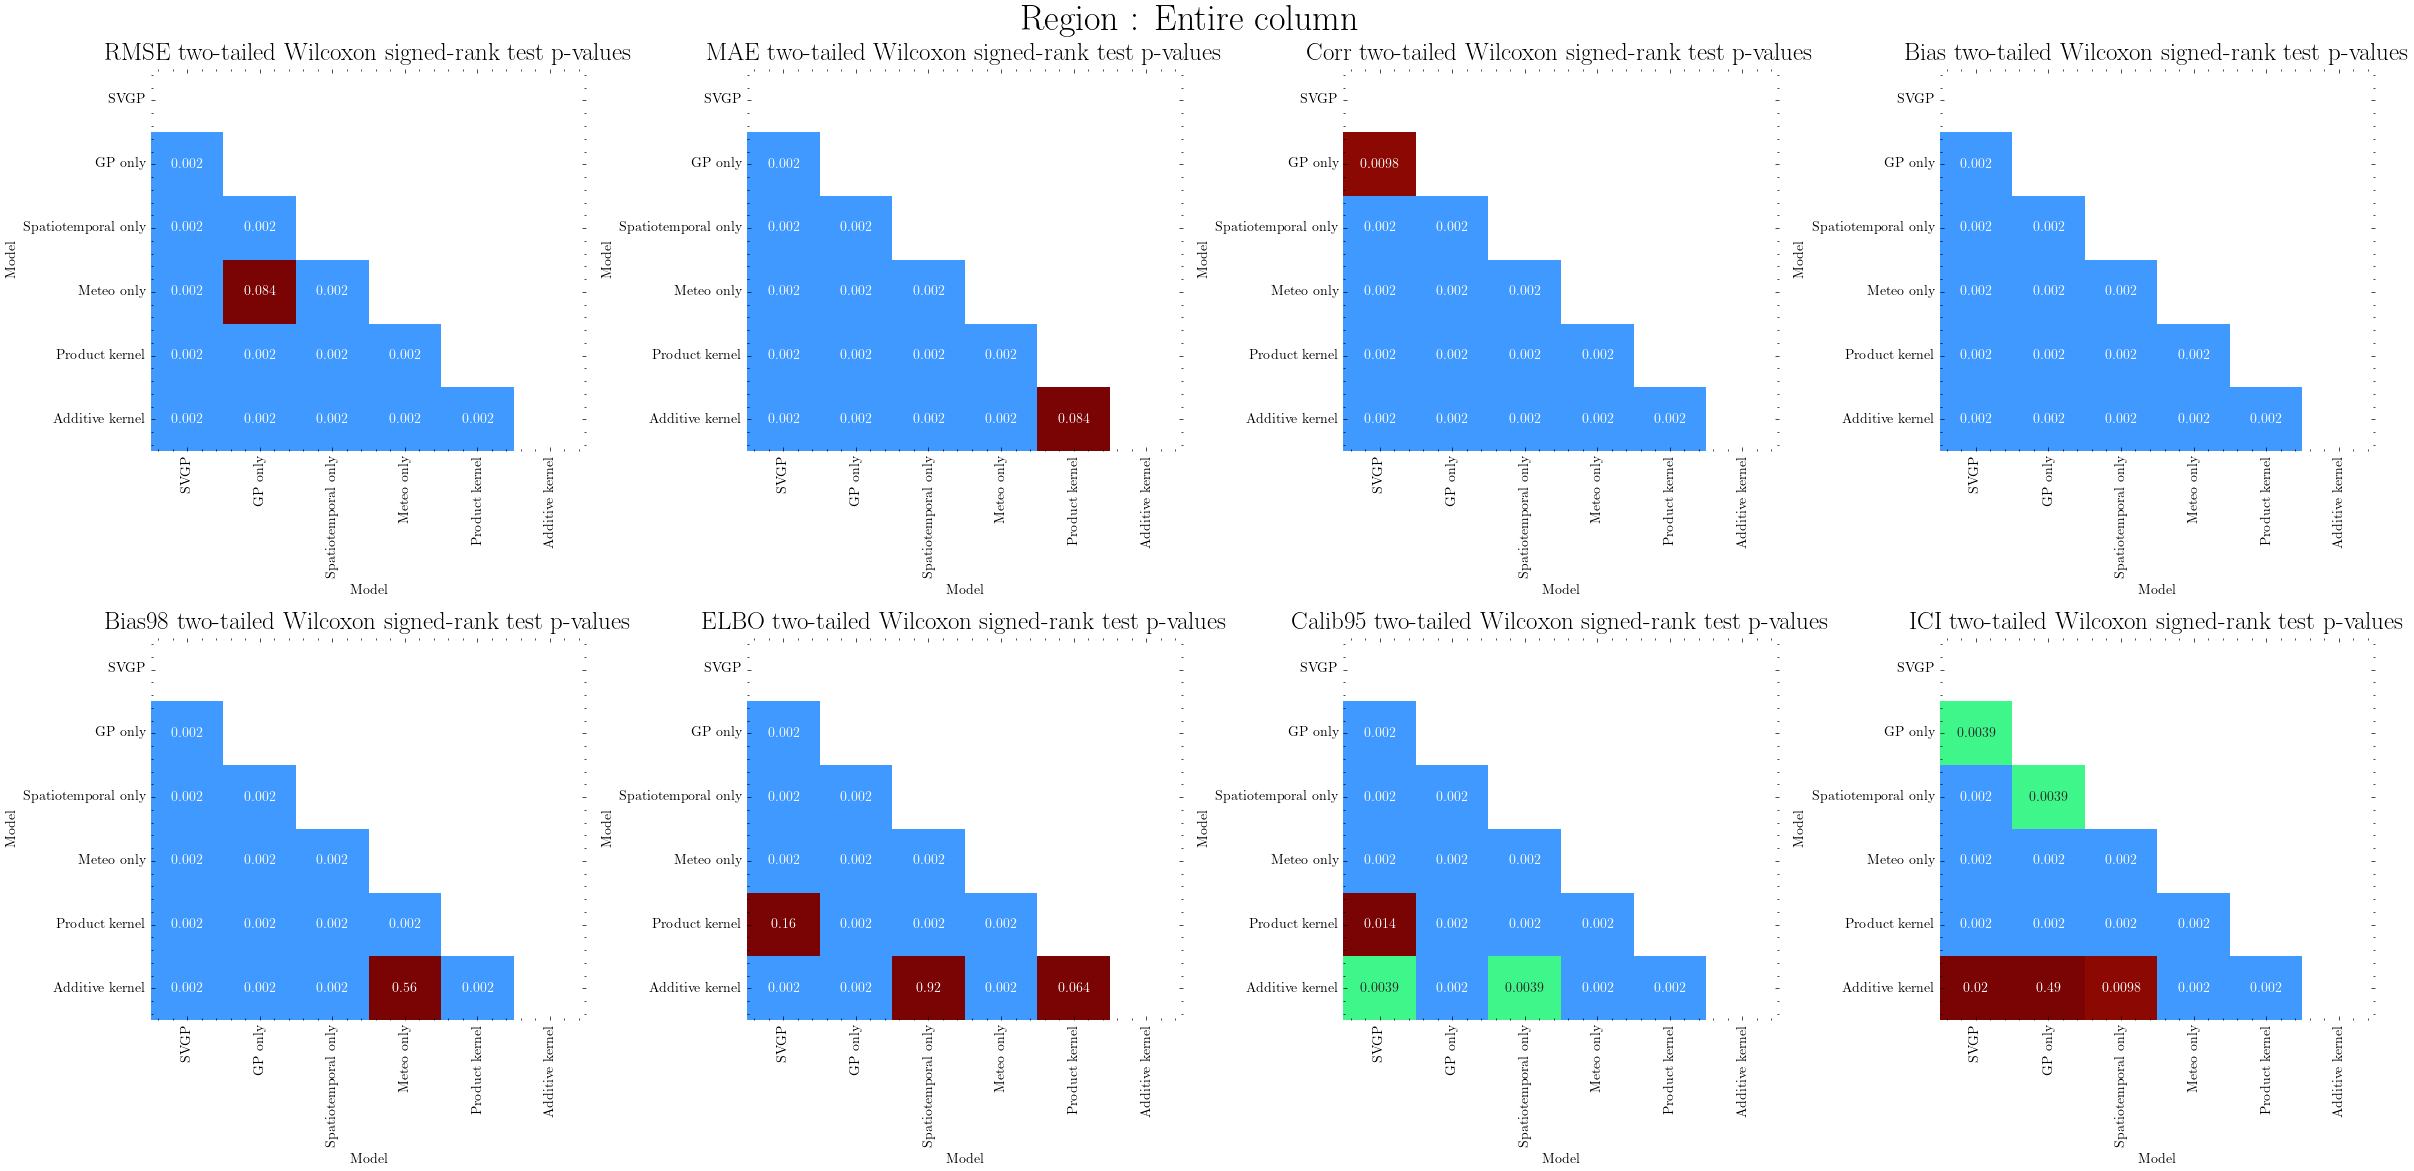

In [16]:
ncol = len(p_dict) // 2
fig, ax = plt.subplots(2, ncol, figsize=(6 * ncol, 12))
for i, key in enumerate(p_dict.keys()):
    mask = np.zeros_like(p_dict[key], dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    p_dict[key][mask] = np.nan
    sns.heatmap(p_dict[key], cmap="turbo", annot=True, cbar=False, vmin=0, vmax=0.01, ax=ax[i // ncol, i % ncol])
    ax[i // ncol, i % ncol].set_title(f"{key} two-tailed Wilcoxon signed-rank test p-values", fontsize=18)
plt.suptitle("Region : Entire column", fontsize=26)
plt.tight_layout()
plt.show()

In [17]:
boundary_layer_det_df = pd.DataFrame(boundary_layer_det_scores).T
boundary_layer_det_df.index = index
boundary_layer_det_df.index.name = 'Model'
boundary_layer_det_df.columns = det_columns
boundary_layer_det_df = boundary_layer_det_df.reindex(index_order)
boundary_layer_det_df = boundary_layer_det_df[det_cols_order]

boundary_layer_prob_df = pd.DataFrame(boundary_layer_prob_scores).T
boundary_layer_prob_df.index = index
boundary_layer_prob_df.index.name = 'Model'
boundary_layer_prob_df.columns = prob_columns
boundary_layer_prob_df = boundary_layer_prob_df.reindex(index_order)
boundary_layer_prob_df = boundary_layer_prob_df[prob_cols_order]

boundary_layer_df = pd.concat([boundary_layer_det_df, boundary_layer_prob_df], axis=1)
W_dict, p_dict = paired_wilcoxon(boundary_layer_df.T)

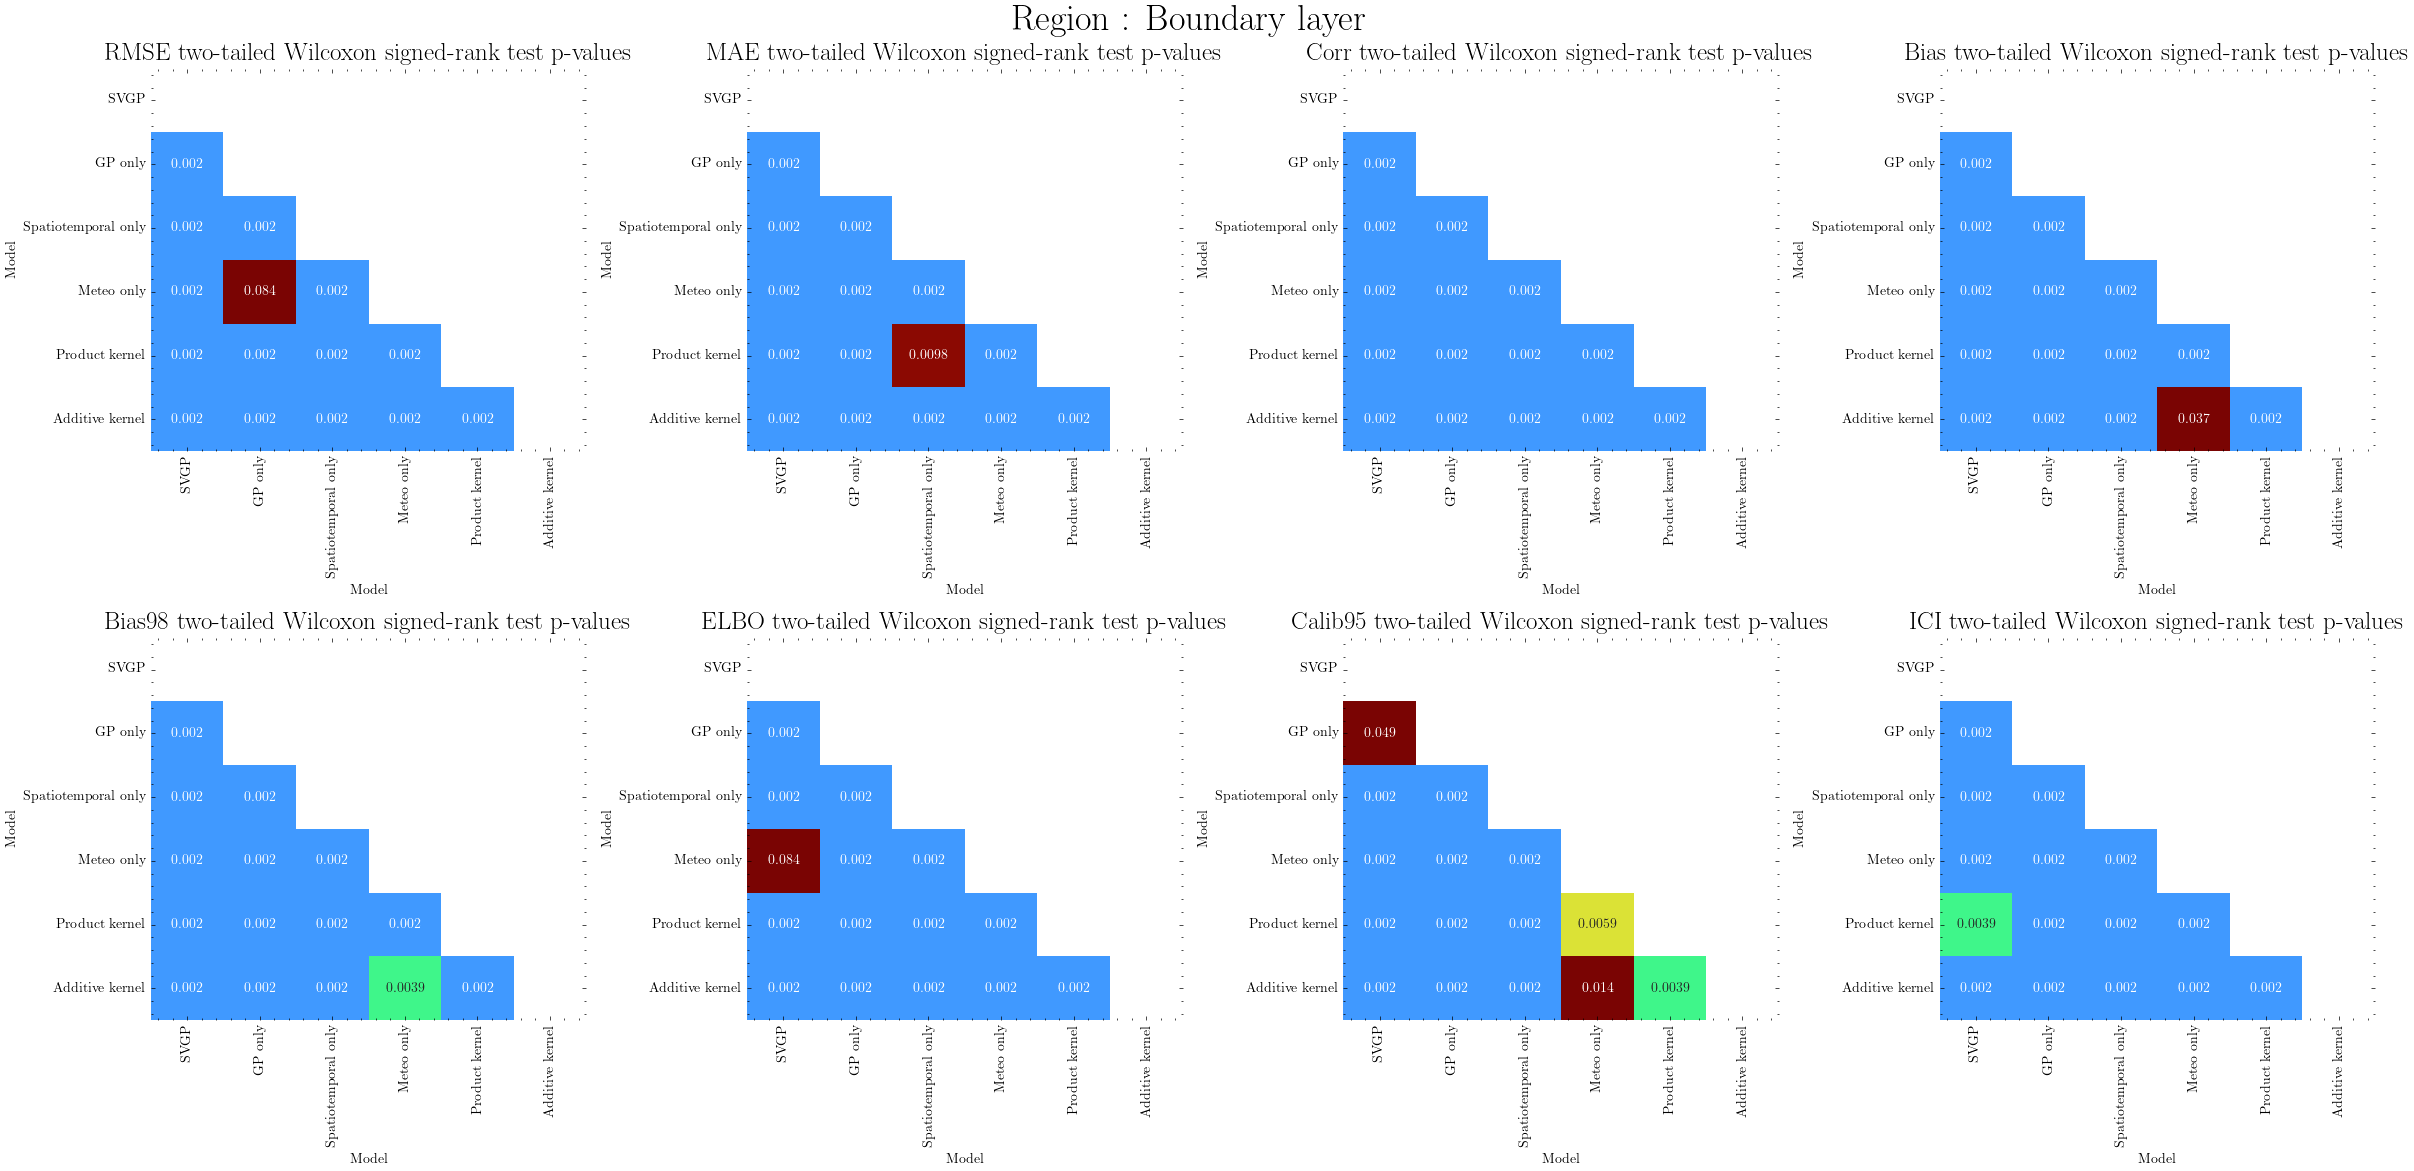

In [18]:
ncol = len(p_dict) // 2
fig, ax = plt.subplots(2, ncol, figsize=(6 * ncol, 12))
for i, key in enumerate(p_dict.keys()):
    mask = np.zeros_like(p_dict[key], dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    p_dict[key][mask] = np.nan
    sns.heatmap(p_dict[key], cmap="turbo", annot=True, cbar=False, vmin=0, vmax=0.01, ax=ax[i // ncol, i % ncol])
    ax[i // ncol, i % ncol].set_title(f"{key} two-tailed Wilcoxon signed-rank test p-values", fontsize=18)
plt.suptitle("Region : Boundary layer", fontsize=26)
plt.tight_layout()
plt.show()

In [19]:
above_boundary_layer_det_df = pd.DataFrame(above_boundary_layer_det_scores).T
above_boundary_layer_det_df.index = index
above_boundary_layer_det_df.index.name = 'Model'
above_boundary_layer_det_df.columns = det_columns
above_boundary_layer_det_df = above_boundary_layer_det_df.reindex(index_order)
above_boundary_layer_det_df = above_boundary_layer_det_df[det_cols_order]

above_boundary_layer_prob_df = pd.DataFrame(above_boundary_layer_prob_scores).T
above_boundary_layer_prob_df.index = index
above_boundary_layer_prob_df.index.name = 'Model'
above_boundary_layer_prob_df.columns = prob_columns
above_boundary_layer_prob_df = above_boundary_layer_prob_df.reindex(index_order)
above_boundary_layer_prob_df = above_boundary_layer_prob_df[prob_cols_order]

above_boundary_layer_df = pd.concat([above_boundary_layer_det_df, above_boundary_layer_prob_df], axis=1)
W_dict, p_dict = paired_wilcoxon(above_boundary_layer_df.T)

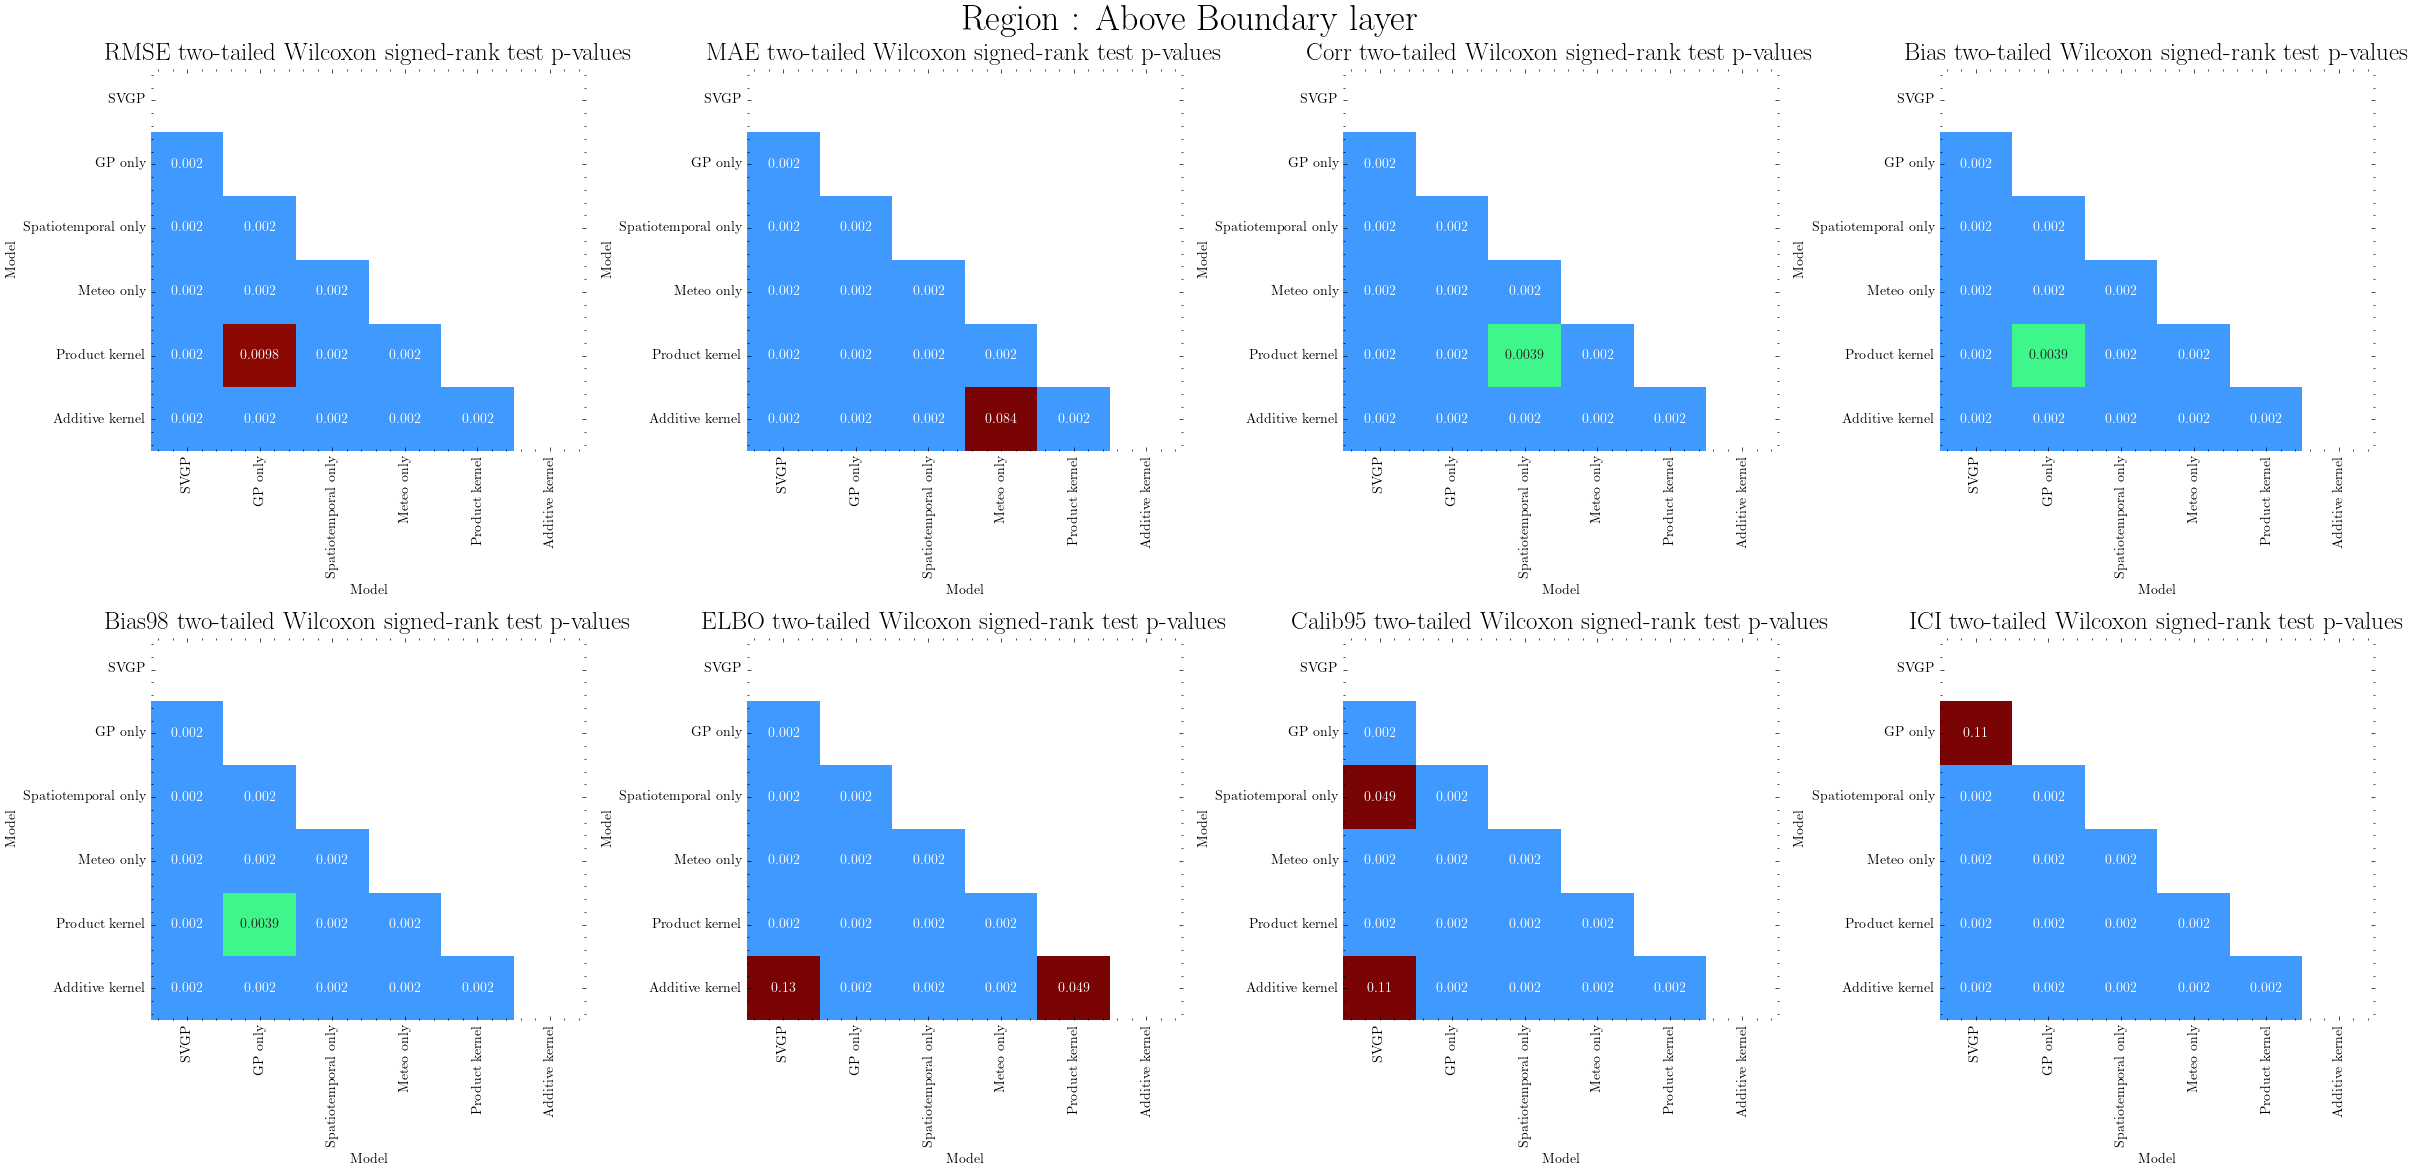

In [20]:
ncol = len(p_dict) // 2
fig, ax = plt.subplots(2, ncol, figsize=(6 * ncol, 12))
for i, key in enumerate(p_dict.keys()):
    mask = np.zeros_like(p_dict[key], dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    p_dict[key][mask] = np.nan
    sns.heatmap(p_dict[key], cmap="turbo", annot=True, cbar=False, vmin=0, vmax=0.01, ax=ax[i // ncol, i % ncol])
    ax[i // ncol, i % ncol].set_title(f"{key} two-tailed Wilcoxon signed-rank test p-values", fontsize=18)
plt.suptitle("Region : Above Boundary layer", fontsize=26)
plt.tight_layout()
plt.show()